# Part I: Research Question
## A1. Proposed Question
What are the key dimensions, as identified by PCA, that explain significant variations in patient data?
## A2. Goal of the Data Analysis
The goal of this analysis is to reduce the dimensionality of the patient data and seek to identify which components (dimensions) explain most of the variance.

# Part II: Method Justification

## B1. How PCA Analyzes the Data Set
PCA, or principal component analysis, is a statistical technique used to reduce the dimensionality of a dataset. This process involves several steps:

1. **Standardization:** The data is standardized by adjusting its mean to zero and its standard deviation to one. This helps to ensure that natural variations do not influence the PCA model in the data.

2. **Covariance Matrix Computation:** PCA computes the covariance matrix of the data. This matrix helps to understand how the variables in the data vary from the mean with respect to each other.

3. **Eigenvalues and Eigenvectors Calculation:** The covariance matrix is decomposed into its eigenvalues and eigenvectors. Eigenvectors determine the directions of the new feature space, while eigenvalues determine their magnitude. Essentially, eigenvectors represent the directions of maximum variance.

4. **Sort Eigenvalues and Eigenvectors:** The eigenvalues and eigenvectors are sorted in order of decreasing eigenvalues. This sorting is important because it tells us the components in order of significance.

5. **Project Data:** Finally, the data is projected onto the new feature space, which is formed by the eigenvectors of the largest eigenvalues. This step effectively reduces the dimensionality of the data, as you select only the first few principal components that correspond to the significant eigenvalues.

## B2. Assumption of PCA
**Linearity:** The most fundamental assumption of PCA is that the data is linear, meaning that the data can be described by linear relationships. This implies that the principal components derived represent linear combinations of the original features.

# Part III: Data Preparation


In [1]:
import pandas as pd
from summarytools import dfSummary
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

## C1. Dataset Variables

While applying PCA to discrete or categorical variables is possible, it is generally not recommended. Therefore, we will use the following variables:
* **`Age`(Continuous):** Age is a fundamental variable often correlating with healthcare needs. Different age groups may show distinct patterns of hospital admissions.

* **`Income`(Continuous):** Socioeconomic status, proxied by income, can influence healthcare access, frequency of hospital visits, and types of illnesses or conditions leading to admissions.

* **`VitD_levels`(Continuous):** Vitamin D levels can indicate overall health and specific health conditions, impacting bone health, immune function, and more.

* **`Initial_days`(Continuous):** This reflects the initial length of stay and can provide insights into the severity of the conditions leading to hospital admissions. It also hints at the efficiency of the hospital's care and treatment processes.

* **`TotalCharge`(Continuous):** The total charge for the hospital stay can help identify patterns related to the cost of care, which might correlate with the complexity or severity of conditions treated at the hospital.

* **`Additional_charges`(Continuous):** Similar to `TotalCharge`, this can give further insights into the financial aspects of care, possibly reflecting on additional services or treatments required by certain patient groups.

In [2]:
data = pd.read_csv('medical_clean.csv')

In [3]:
dfSummary(data,is_collapsible=True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CaseOrder[int64],Mean (sd) : 5000.5 (2886.9)min < med < max:1.0 < 5000.5 < 10000.0IQR (CV) : 4999.5 (1.7),"10,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Customer_id[object],1. C4124032. D2943643. B2032104. C201775. K2160206. O8966257. M3047798. H894379. A14383410. L21446011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)9,990 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
3,Interaction[object],1. 8cd49b13-f45a-4b47-a2bd-173ffa2. dc1799a6-61d1-44a3-9b94-b895843. dc6bab10-659b-4c78-ba87-87ffa34. 1cb70cc8-47b7-4192-8bed-faad0f5. 06d0da86-5600-472d-a35d-7632776. 18b8277b-c5aa-4f80-8439-b12ad87. 32cb2440-1fda-4ed6-b00b-2829bf8. 344ea878-976d-469b-8332-e1b1ab9. 52e1962b-8ed4-447a-a818-df09c210. 8ce5b34d-efff-4229-b23e-5510e211. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)9,990 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI

In [4]:
data['Age'] = data['Age'].astype('float64')
data = data.select_dtypes(include=['float64'])
df=data.copy()
df.drop(columns=['Lat','Lng'],inplace=True)

## C2: Standardizing

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
dfSummary(pd.DataFrame(data_scaled, columns=df.columns))

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[float64],Mean (sd) : 0.0 (1.0)min < med < max:-1.7 < -0.0 < 1.7IQR (CV) : 1.7 (0.0),72 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3asU/bQBiG8e8Sgi6E2gpJYcvSEalDJBaWbh37x3bt1iFInRm6dGJBSMgkiksUY6dDkaoONPY5Jn2t57eGL3Z0z+ELwm02GwP+d5193wBQxsG+bwDt4Zzrm9lh4Ph6s9k8vvQioWInnHP90Wj0KYqiYcj8YrFInHOfX4p1a6hN7hK0ymEURcPLy8vHOI5XVQbn87mfzWbD+/v7QzOrHmrTuwTtE8fx6vT09GfAaP9fL277jdroLgHKKnVGbWqXYPfaelRr7Zepmgtm9vtPd0Xg7F4WvM1HtUZDzfO8Z2aRcy70LUJj8ScnJx/jOB6EXDTP816apu+Oj49/dDqdrOr8w8PD0jn3xcwqHZee1Ym8tUe1xkJN07SXZdn7yWTS7Xa7lResTixZlnkzO7+4uPg2Ho8XVa99c3MzvL6+fjudTr+fnZ0lVWZvb2/fXF1dfZhMJuOQz10z8qgoil4cx0nbjmqNhbperw+890fT6XRVdbHN6sXyPHvkvc9CFixJkr6Z2WAwqHw2T5KkH/q560aeZZnP8/x8tVp9NbPKn7vmEzAqiqIXMlhG42fUkMU2qx9L1evt2mtHbvZngz49PXWrztZ9AtbdJNu09suUsrqbO8SOnoBBm6QMQsVf9rFJyuC/pyCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCHhoMwPzedzX/WNl8ulNzNL09Tf3d0dvea86rVV77vufJm+fgFFPnL1B2RO9gAAAABJRU5ErkJggg=="">",0(0.0%)
2,Income[float64],Mean (sd) : 0.0 (1.0)min < med < max:-1.4 < -0.2 < 5.8IQR (CV) : 1.2 (0.0),"9,993 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3cMW/aQBiA4e9KQAYiAyKCjZWhUgdGlv6D/tiu3YrEjsQ/YEMyGIQbB2PcKVPTJNzZ6X3u++xnbnhldHB3pigKAXz36V9PAHiPuyofboxpi0jL4RHnoigey5oP9KosVGNMezgcfgvDcGD7jOPxuDfGfCdWVPlGbYVhOJjP54+9Xi+9dfDhcAiWy+UgiqKWiBDqf67Sr34RkV6vl45Go1+Ww9ulTgZqsZiCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQpv/jPlsLEkvF6vTYtxwB9eDdVlY0mWZUGe55/TNP0pIrZ/oQIi8vYb1XpjyWazGazX687lcmk4zA8QkXduSrHZWLLf79lQgtKwmIIKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFSo/1+8iz/OmiITGGJvhXAdUI96GmiRJM8uyL5PJpNFoNG6+aYXrgOrF21DP5/NdEASd2WyWjsfj/S1juQ6ofrwN9Vm327W9EojdWzXCYgoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQre70e15XiMRYSjLF6pZaiux1hEOMrim1qG6nKMRYSjLD6qZajPHI6xiHCUxSsspqACoUIFQoUKhAoVCBUqECpUIFSoQKhQodY/+Lvgyku/EOoLuPLSP4T6Aq689A+hvoIrL/3BYgoq8EatAAux8hFqyViIVYNQS+a6EFssFqMoih6MMUfbKdQxckKtiM1CrIwjNHEcn4wxP0TEZry3kb8r1MPhENz64NPpFIiIJEkSbLfbzkeO1/rZu93uPgiCznQ6Nf1+/+mWsSIicRzfr1arr5PJ5MEmdMfIXT0VRfHXz/0NFyk98m/OwwoAAAAASUVORK5CYII="">",0(0.0%)
3,VitD_levels[float64],Mean (sd) : -0.0 (1.0)min < med < max:-4.0 < -0.0 < 4.2IQR (CV) : 1.3 (-0.0),"9,976 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkElEQVR4nO3csY7aQBCA4dn4IAYSW4AEHS9wUgpK+rR52LTpUlBczRvQIAQyIHznYIzTpYLk8Jqws/xfP6ctfp1s3+2YsiwFcN2Hex8AeI+nex/AVcaYlog0K44fyrJ8q/M8j45QzzDGtPr9/rcoirpV5ne7XWKM+U6s9SHU85pRFHUnk8lbHMfZNYPb7TacTqfd9XrdFBFCrQmh/kUcx9lgMHitMNqq/TAPjpcpqECoUIFQoQLPqDdQFEVDRCJjTJVxPm2dQag1S9O0kef5l9FoFARBcNUXAxE+bV1CqDU7HA5PYRi2x+NxNhwOk2tm+bR1GaHeSKfT4dNWjXiZggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVPD2cp/l2sjodDo16jwP7HgZqu3ayDzPw6IonrMs+ykiVW6SomZehioWayNFRObzeXc2m7WPx2Nwi8Pher6GKiLV10YmScLdesfwMgUVvP6NqpHlgjURT5esEapDbBesifi7ZI1QHWKzYE3E7yVrhOogiwVrIp4uWeNlCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFZz+x2mLJRIskPCMs6HaLJFggYR/nA1VLJZIsEDCPy6HKiLVlkg88gIJy+vWzl61dj5UvJ/tdWuXr1oTqkdsrlu7ftWaUD1kcd3a2UcmvqNCBUKFCoQKFW76jMp6cl1c3iT4z1CNMaGIfKzws8Ner/c1juNPFWb//HVptVq9XDu73+9DEZE0TcPlctn+n/P3mrWdXywWn203CW42m70x5oeIVJn/VZblxbnfLfkrwSxU0C0AAAAASUVORK5CYII="">",0(0.0%)
4,Initial_days[float64],Mean (sd) : -0.0 (1.0)min < med < max:-1.3 < 0.1 < 1.4IQR (CV) : 2.0 (-0.0),"9,997 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEU

## Part IV: Analysis

In [6]:
pca = PCA()
pca.fit(data_scaled); 

## D1. Principal Component Matrix


In [7]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Creating a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'], index=df.columns)
display(loadings_df)

,PC1,PC2,PC3,PC4,PC5,PC6
Age,0.121178,0.918361,0.018052,0.001086,0.376423,0.002846
Income,-0.029431,-0.024631,0.705365,0.707874,0.001207,0.000139
VitD_levels,-0.002371,0.025223,-0.716987,0.696697,-0.000993,-0.000168
Initial_days,0.989668,-0.119729,0.008332,0.011055,0.016868,-0.076464
TotalCharge,0.991255,-0.105924,0.005966,0.011329,-0.016742,0.076486
Additional_charges,0.121455,0.918359,0.022333,0.001512,-0.376096,-0.003985


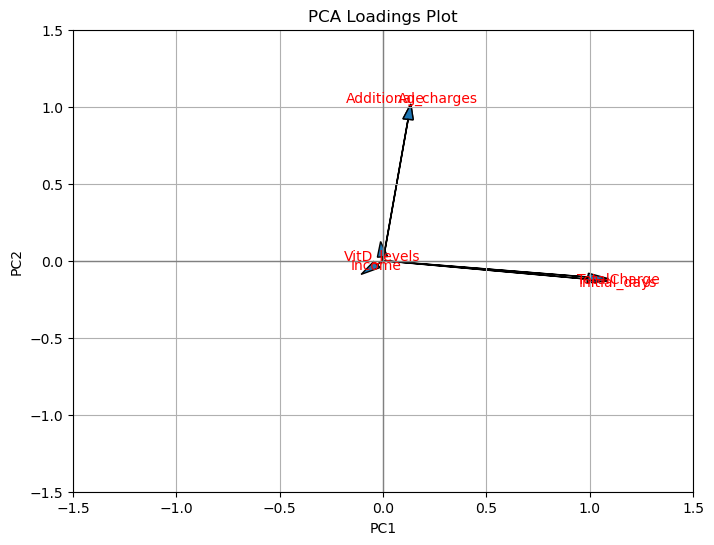

In [8]:
# Plotting the loadings
plt.figure(figsize=(8, 6))
for i in range(len(loadings_df)):
    plt.arrow(0, 0, loadings_df.PC1[i], loadings_df.PC2[i], head_width=0.05, head_length=0.1)
    plt.text(loadings_df.PC1[i] * 1.15, loadings_df.PC2[i] * 1.15, loadings_df.index[i], color='red', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Loadings Plot")
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

### Understanding Overlapping Vectors in PCA

**Directional Alignment:** In PCA, each vector represents the direction and magnitude of a variable's contribution to a principal component. If two vectors are pointing in roughly the same direction or overlapping, these variables contribute similarly to the component, indicating a potential correlation between them.

**Correlation Implications:**

- **Positive Correlation:** Vectors that align closely in the same direction suggest a positive correlation, meaning the variables increase together.

- **Negative Correlation:** Vectors that point in opposite directions suggest a negative correlation, indicating that the other decreases as one variable increases.

- **Magnitude and Importance:** The length of the vectors indicates the strength of the variable's contribution to the principal component. Longer vectors have a more significant influence on the component.

### Why This Matters

PCA aims to reduce the number of variables while retaining as much information as possible. Correlated variables carry similar information, so PCA captures this information with fewer components.

## D2. Identifying Number of Principal Components

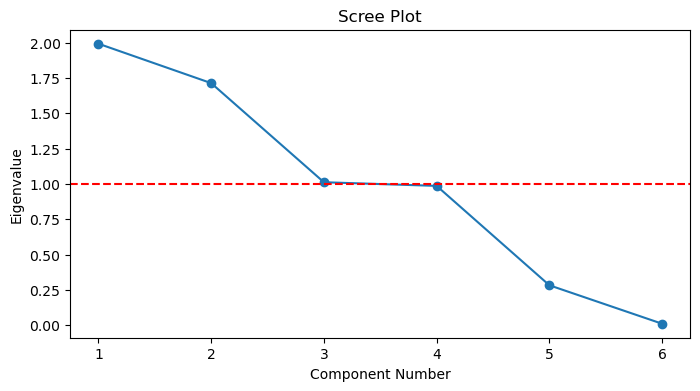

In [9]:
plt.figure(figsize=(8, 4))

# Left plot (Scree plot)
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In a this plot, eigenvalues are plotted against the corresponding PC number.

## D4: Total Variance

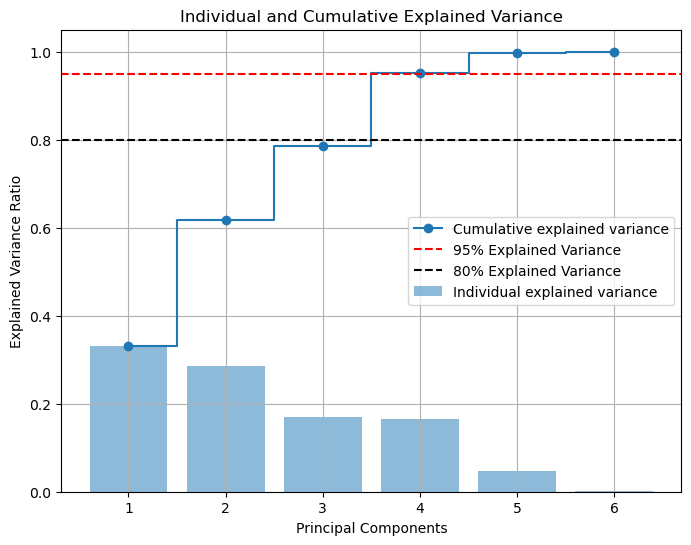

In [10]:
# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Creating a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance)+1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance',marker='o')
plt.axhline(y=.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=.80, color='black', linestyle='--', label='80% Explained Variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Individual and Cumulative Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In this plot:

* The bar graph represents the variance explained by each principal component individually.
* The step line indicates the cumulative variance explained as you include more components.

In [11]:
print(f"Contribution Breakdown:")
pc_contributions = list(pca.explained_variance_ratio_)
pc_names = list(loadings_df.columns)
for i in range(len(pc_names)):
    print(f"{pc_names[i]}: {round(pc_contributions[i] * 100, 3)}%")

Contribution Breakdown:
PC1: 33.202%
PC2: 28.557%
PC3: 16.874%
PC4: 16.444%
PC5: 4.728%
PC6: 0.195%


## D5: Summary

### Decision Criteria

The Kaiser criterion uses eigenvalues to determine the number of principal components. Eigenvalues indicate how much of the variance in the data each factor accounts for. Factors with eigenvalues greater than one are considered significant and should be kept, while those with eigenvalues less than one are not significant and should be removed.

- **PC1 and PC2:** Together, they explain about 61.759% of the variance. While significant, it falls short of the typical 70-80% threshold.
- **PC1, PC2, and PC3:** Together, these components explain approximately 78.633% of the variance. This crosses the lower end of the typical threshold and meets the Kaiser criterion, making it a reasonable choice for retaining essential information while avoiding overfitting.
- **Adding PC4:** Including the fourth principal component brings the cumulative explained variance to 95.077%. This is well above the usual threshold, suggesting excellent coverage of the data's variance, though at the cost of a less economical model.

- **Minimum Model:** For a simpler model, retain PC1, PC2, and PC3. This model explains nearly 80% of the variance, which is generally sufficient for most analyses and helps maintain a balance between information retention and model complexity.
- **Comprehensive Model:** If capturing as much variance as possible is essential, and the model can tolerate a bit more complexity, consider including PC4, bringing the total explained variance to over 95%. This might be particularly useful given the medical domain requires capturing subtle variations in the data.

After conducting Principal Component Analysis (PCA) on the medical dataset, we successfully achieved our objective of reducing the dimensionality of the patient data, enabling us to pinpoint the principal components that account for the most significant variance.